In [22]:
import pandas as pd
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [23]:
datos=pd.read_csv("advertising.csv")

In [24]:
datos.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [47]:
X=np.array(datos[["TV", "Radio", "Newspaper"]])
Y=np.array(datos[["Sales"]])

In [48]:

X = hstack = np.hstack((np.ones((X.shape[0],1)), X))
result = np.linalg.inv(X.T@X)@X.T@Y
result=[np.round(r[0],6) for r in result]

In [49]:
result

[np.float64(4.625124),
 np.float64(0.054446),
 np.float64(0.107001),
 np.float64(0.000336)]

In [6]:
print(Y)

[[22.1]
 [10.4]
 [12. ]
 [16.5]
 [17.9]
 [ 7.2]
 [11.8]
 [13.2]
 [ 4.8]
 [15.6]
 [12.6]
 [17.4]
 [ 9.2]
 [13.7]
 [19. ]
 [22.4]
 [12.5]
 [24.4]
 [11.3]
 [14.6]
 [18. ]
 [17.5]
 [ 5.6]
 [20.5]
 [ 9.7]
 [17. ]
 [15. ]
 [20.9]
 [18.9]
 [10.5]
 [21.4]
 [11.9]
 [13.2]
 [17.4]
 [11.9]
 [17.8]
 [25.4]
 [14.7]
 [10.1]
 [21.5]
 [16.6]
 [17.1]
 [20.7]
 [17.9]
 [ 8.5]
 [16.1]
 [10.6]
 [23.2]
 [19.8]
 [ 9.7]
 [16.4]
 [10.7]
 [22.6]
 [21.2]
 [20.2]
 [23.7]
 [ 5.5]
 [13.2]
 [23.8]
 [18.4]
 [ 8.1]
 [24.2]
 [20.7]
 [14. ]
 [16. ]
 [11.3]
 [11. ]
 [13.4]
 [18.9]
 [22.3]
 [18.3]
 [12.4]
 [ 8.8]
 [11. ]
 [17. ]
 [ 8.7]
 [ 6.9]
 [14.2]
 [ 5.3]
 [11. ]
 [11.8]
 [17.3]
 [11.3]
 [13.6]
 [21.7]
 [20.2]
 [12. ]
 [16. ]
 [12.9]
 [16.7]
 [14. ]
 [ 7.3]
 [19.4]
 [22.2]
 [11.5]
 [16.9]
 [16.7]
 [20.5]
 [25.4]
 [17.2]
 [16.7]
 [23.8]
 [19.8]
 [19.7]
 [20.7]
 [15. ]
 [ 7.2]
 [12. ]
 [ 5.3]
 [19.8]
 [18.4]
 [21.8]
 [17.1]
 [20.9]
 [14.6]
 [12.6]
 [12.2]
 [ 9.4]
 [15.9]
 [ 6.6]
 [15.5]
 [ 7. ]
 [16.6]
 [15.2]
 [19.7]


In [7]:
indices = np.array(range(1, len(Y)+1))

<function matplotlib.pyplot.show(close=None, block=None)>

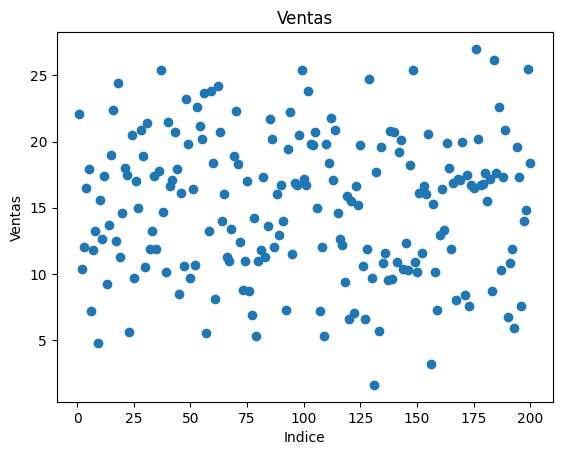

In [8]:
plt.scatter(indices, Y)
plt.xlabel("Indice")
plt.ylabel("Ventas")
plt.title("Ventas")
plt.show

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=3, test_size=0.2)

In [10]:
modelo_lineal = linear_model.LinearRegression()
modelo_lineal.fit(X_train, Y_train)

LinearRegression()

In [11]:
print(modelo_lineal.coef_)
print(modelo_lineal.intercept_)

[[0.05424164 0.10315475 0.00431063]]
[4.57697384]


In [12]:
Y_test_pred = modelo_lineal.predict(X_test)

In [13]:
import sklearn.metrics as sm
print("Error absoluto medio =", round(sm.mean_absolute_error(Y_test, Y_test_pred), 2)) 
print("Error cuadratico medio =", round(sm.mean_squared_error(Y_test, Y_test_pred), 2)) 
print("Puntuación de varianza explicada =", round(sm.explained_variance_score(Y_test, Y_test_pred), 2)) 
print("Puntuación R2 =", round(sm.r2_score(Y_test, Y_test_pred), 2))

Error absoluto medio = 1.04
Error cuadratico medio = 1.99
Puntuación de varianza explicada = 0.92
Puntuación R2 = 0.91


<function matplotlib.pyplot.show(close=None, block=None)>

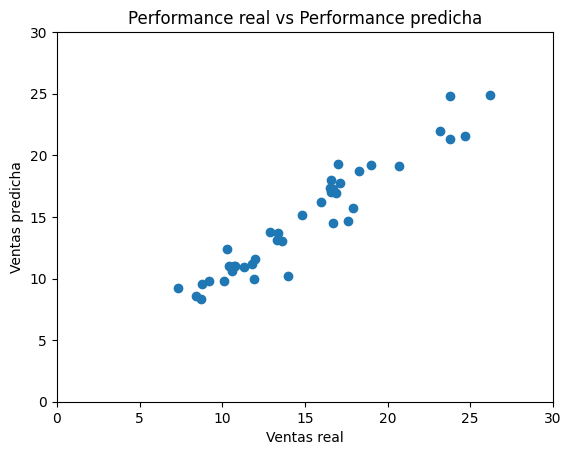

In [14]:
plt.scatter(Y_test, Y_test_pred)
plt.xlabel("Ventas real")
plt.ylabel("Ventas predicha")
plt.xlim(0,30)
plt.ylim(0,30)
plt.title("Performance real vs Performance predicha")
plt.show

In [15]:
error = (abs(Y_test - Y_test_pred)/abs(Y_test))*100
err_min = np.min(error)
err_max = np.max(error)
ind_max = np.argmax(error)
print(err_min)
print(err_max)
print(ind_max)

0.1322814290241834
26.950640199045928
35


<function matplotlib.pyplot.show(close=None, block=None)>

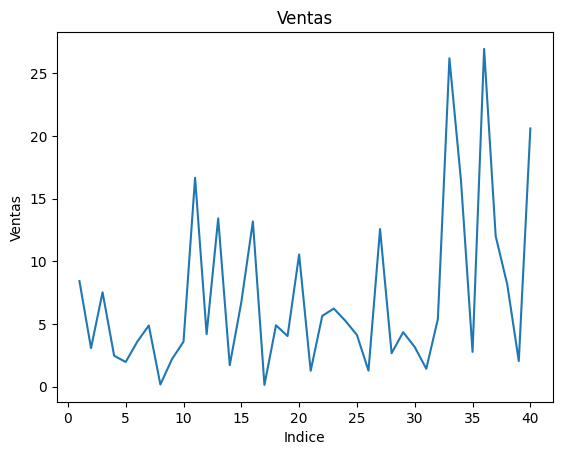

In [16]:
indices_test = np.array(range(1, len(Y_test)+1))

plt.plot(indices_test, error)
plt.xlabel("Indice")
plt.ylabel("Ventas")
plt.title("Ventas")
plt.show

In [17]:
regresion_ridge = linear_model.Ridge(alpha=0.01, fit_intercept=True, max_iter=10000)
regresion_ridge.fit(X_train, Y_train)

Ridge(alpha=0.01, max_iter=10000)

In [18]:
print(regresion_ridge.coef_)
print(regresion_ridge.intercept_)

[0.05424164 0.10315471 0.00431064]
[4.57697442]


In [19]:
Y_test_pred_ridge = regresion_ridge.predict(X_test)

In [20]:
import sklearn.metrics as sm
print("Error absoluto medio =", round(sm.mean_absolute_error(Y_test, Y_test_pred_ridge), 2)) 
print("Error cuadratico medio =", round(sm.mean_squared_error(Y_test, Y_test_pred_ridge), 2)) 
print("Puntuación de varianza explicada =", round(sm.explained_variance_score(Y_test, Y_test_pred_ridge), 2)) 
print("Puntuación R2 =", round(sm.r2_score(Y_test, Y_test_pred_ridge), 2))

Error absoluto medio = 1.04
Error cuadratico medio = 1.99
Puntuación de varianza explicada = 0.92
Puntuación R2 = 0.91
